In [1]:
import pandas as pd
import numpy as np
import warnings

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import plotly.io as pio

import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

pio.templates.default = "ggplot2"

#dataframe display settings
pd.set_option('display.max_columns', 5000000)
pd.set_option('display.max_rows', 50000000)

In [2]:
# LOAD DATA
## Data from dataset 1
acquisitions = pd.read_csv('data/acquisitions.csv')
funding_rounds = pd.read_csv('data/funding_rounds.csv')
funds = pd.read_csv('data/funds.csv')
investments = pd.read_csv('data/investments.csv')
ipos = pd.read_csv('data/ipos.csv')
milestones = pd.read_csv('data/milestones.csv')
objects = pd.read_csv('data/objects.csv')
offices = pd.read_csv('data/offices.csv')
people = pd.read_csv('data/people.csv')
relationships = pd.read_csv('data/relationships.csv')


In [3]:
# Merge datasets based on relations
existing_investments = pd.merge(funds, investments, left_on='object_id', right_on='investor_object_id')
existing_investments = pd.merge(existing_investments, objects, left_on='funded_object_id', right_on='id')
existing_investments.head(5)



,id_x,fund_id,object_id,name_x,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at_x,updated_at_x,id_y,funding_round_id,funded_object_id,investor_object_id,created_at_y,updated_at_y,id,entity_type,entity_id,parent_id,name_y,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16,925,596,c:803,f:371,2007-09-03 12:13:09,2009-03-10 17:35:37,c:803,Company,803,NaN,RotoHog,rotohog,/company/rotohog,games_video,closed,NaN,2012-02-07,rotohog.com,http://www.rotohog.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,197,90,NaN,provider and developer of fantasy sports,RotoHog.com is the provider and developer of f...,NaN,USA,CA,Los Angeles,Los Angeles,NaN,NaN,0,0,2007-08-01,2009-03-10,2,8000000.0,2009-03-10,2009-03-10,1,2,initial-importer,2007-09-03 12:09:21,2013-10-03 11:10:26
1,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16,7200,5247,c:803,f:371,2009-03-10 17:35:37,2009-03-11 01:24:20,c:803,Company,803,NaN,RotoHog,rotohog,/company/rotohog,games_video,closed,NaN,2012-02-07,rotohog.com,http://www.rotohog.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,197,90,NaN,provider and developer of fantasy sports,RotoHog.com is the provider and developer of f...,NaN,USA,CA,Los Angeles,Los Angeles,NaN,NaN,0,0,2007-08-01,2009-03-10,2,8000000.0,2009-03-10,2009-03-10,1,2,initial-importer,2007-09-03 12:09:21,2013-10-03 11:10:26
2,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16,4298,3212,c:1762,f:371,2008-08-19 20:28:31,2008-08-19 20:28:52,c:1762,Company,1762,NaN,"Splashtop, Inc",splashtop,/company/devicevm,software,operating,2006-01-01,NaN,splashtop.com,http://www.splashtop.com,splashtop,http://s3.amazonaws.com/crunchbase_prod_assets...,150,26,NaN,instant internet environment,Splashtop (formerly DeviceVM) designs and deve...,"instant, internet, environment, launchpad",USA,CA,San Jose,SF Bay,NaN,NaN,0,0,2006-08-01,2010-06-02,4,45500000.0,2006-06-01,2010-10-22,3,12,initial-importer,2008-01-10 11:24:19,2013-03-23 09:16:09
3,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16,25490,16722,c:1762,f:371,2010-07-07 10:01:42,2010-07-07 10:01:43,c:1762,Company,1762,NaN,"Splashtop, Inc",splashtop,/company/devicevm,software,operating,2006-01-01,NaN,splashtop.com,http://www.splashtop.com,splashtop,http://s3.amazonaws.com/crunchbase_prod_assets...,150,26,NaN,instant internet environment,Splashtop (formerly DeviceVM) designs and deve...,"instant, internet, environment, launchpad",USA,CA,San Jose,SF Bay,NaN,NaN,0,0,2006-08-01,2010-06-02,4,45500000.0,2006-06-01,2010-10-22,3,12,initial-importer,2008-01-10 11:24:19,2013-03-23 09:16:09
4,37,37,f:26,Tenth Fund,2010-07-01,350000000.0,USD,http://venturebeat.com/2007/03/22/dfj-raises-4...,Venture Beat,2009-01-29 05:26:54,2013-08-02 23:08:53,1985,1329,c:1762,f:26,2008-01-10 11:54:49,2010-04-13 03:01:35,c:1762,Company,1762,NaN,"Splashtop, Inc",splashtop,/company/devicevm,software,operating,2006-01-01,NaN,splashtop.com,http://www.splashtop.com,splashtop,http://s3.amazonaws.com/crunchbase_prod_assets...,150,26,NaN,instant internet environment,Splashtop (formerly DeviceVM) designs and deve...,"instant, internet, environment, launchpad",USA,CA,San Jose,SF Bay,NaN

In [4]:
existing_investments.drop_duplicates()
existing_investments.shape

(71811, 57)

In [5]:
existing_investments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71811 entries, 0 to 71810
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  71811 non-null  int64  
 1   fund_id               71811 non-null  int64  
 2   object_id             71811 non-null  object 
 3   name_x                71811 non-null  object 
 4   funded_at             69562 non-null  object 
 5   raised_amount         71811 non-null  float64
 6   raised_currency_code  71811 non-null  object 
 7   source_url            58458 non-null  object 
 8   source_description    59366 non-null  object 
 9   created_at_x          71811 non-null  object 
 10  updated_at_x          71811 non-null  object 
 11  id_y                  71811 non-null  int64  
 12  funding_round_id      71811 non-null  int64  
 13  funded_object_id      71811 non-null  object 
 14  investor_object_id    71811 non-null  object 
 15  created_at_y       

In [6]:
existing_investments.drop('parent_id', inplace=True, axis=1)

Silhouette Score: 0.5710235999456812


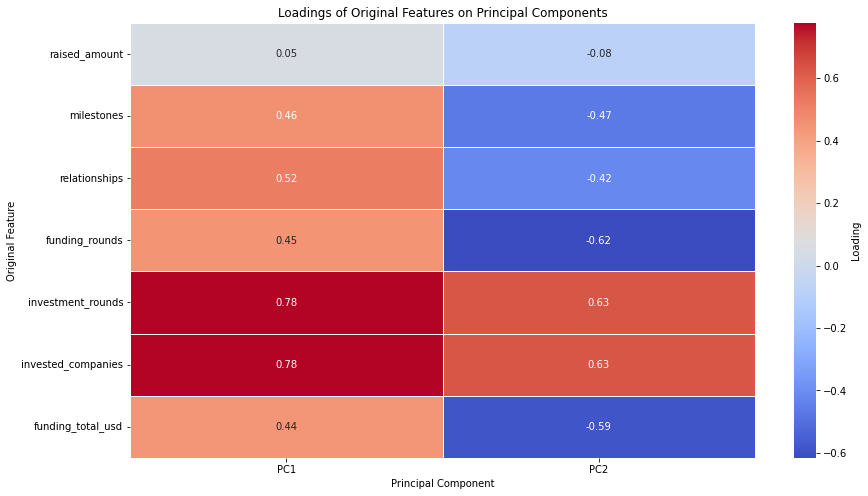

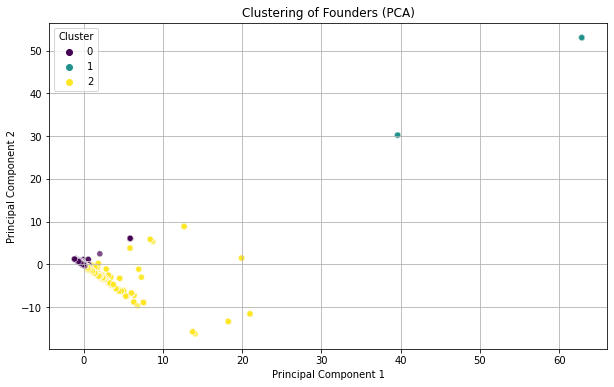

               PC1        PC2
Cluster                      
0        -0.442335   0.477663
1        48.319164  38.795352
2         0.966704  -1.179717


In [9]:
# Clustering
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

selected_columns = ['raised_amount', 'milestones', 'relationships',
                    'funding_rounds', 'investment_rounds', 'invested_companies', 'funding_total_usd']


# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
existing_investments[selected_columns] = imputer.fit_transform(existing_investments[selected_columns])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(existing_investments[selected_columns])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
clusters = kmeans.labels_


# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Obtain the loadings of each original feature on the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=selected_columns)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Compute silhouette score
silhouette_avg = silhouette_score(pca_df.drop(['Cluster'], axis=1), pca_df['Cluster'])
print("Silhouette Score:", silhouette_avg)

# Interpretation
# Plot the loadings heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(loadings_df, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Loading'})
plt.title('Loadings of Original Features on Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Original Feature')
plt.show()


# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Clustering of Founders (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Analyze the characteristics of each cluster
cluster_summary = pca_df.groupby('Cluster').mean()
print(cluster_summary)